Going into the understanding of practicing Lasso and Ridge Regression

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Bryce\AppData\Local\Temp\ipykernel_17976\4157625491.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


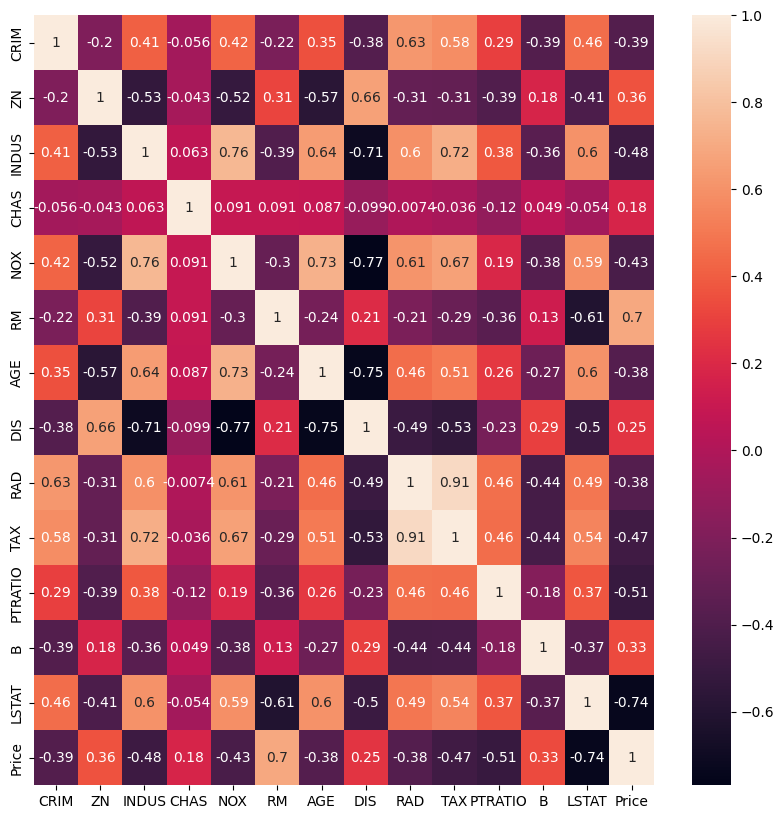

In [21]:
# load_boston was depricated therefor fetching it from the source here...


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston_data = np.hstack([data, target.reshape(-1, 1)])


# need to make this data more understandable.. and reflect on the tutorial more
column_names = [
    'CRIM',    # per capita crime rate by town
    'ZN',      # proportion of residential land zoned for lots over 25,000 sq.ft.
    'INDUS',   # proportion of non-retail business acres per town
    'CHAS',    # Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    'NOX',     # nitric oxides concentration (parts per 10 million)
    'RM',      # average number of rooms per dwelling
    'AGE',     # proportion of owner-occupied units built prior to 1940
    'DIS',     # weighted distances to five Boston employment centers
    'RAD',     # index of accessibility to radial highways
    'TAX',     # full-value property-tax rate per $10,000
    'PTRATIO', # pupil-teacher ratio by town
    'B',       # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    'LSTAT',   # % lower status of the population
    'MEDV'     # Median value of owner-occupied homes in $1000's
]

# Assign column names
boston_df = pd.DataFrame(boston_data, columns=column_names)

# rename 'MEDV' to 'Price' to match my tutorial
boston_df.rename(columns={'MEDV': 'Price'}, inplace=True)


boston_df.head()
# see a heat map of whats going on here
plt.figure(figsize=(10,10))
sns.heatmap(boston_df.corr(), annot = True)
plt.show()





We can see in the above heatmap that there is a strong relation between NOX and INDUS with a > .75... This is considered multicollinearity.


- |r| < 0.3: Weak correlation
- 0.3 ≤ |r| < 0.7: Moderate correlation
- |r| ≥ 0.7: Strong correlation


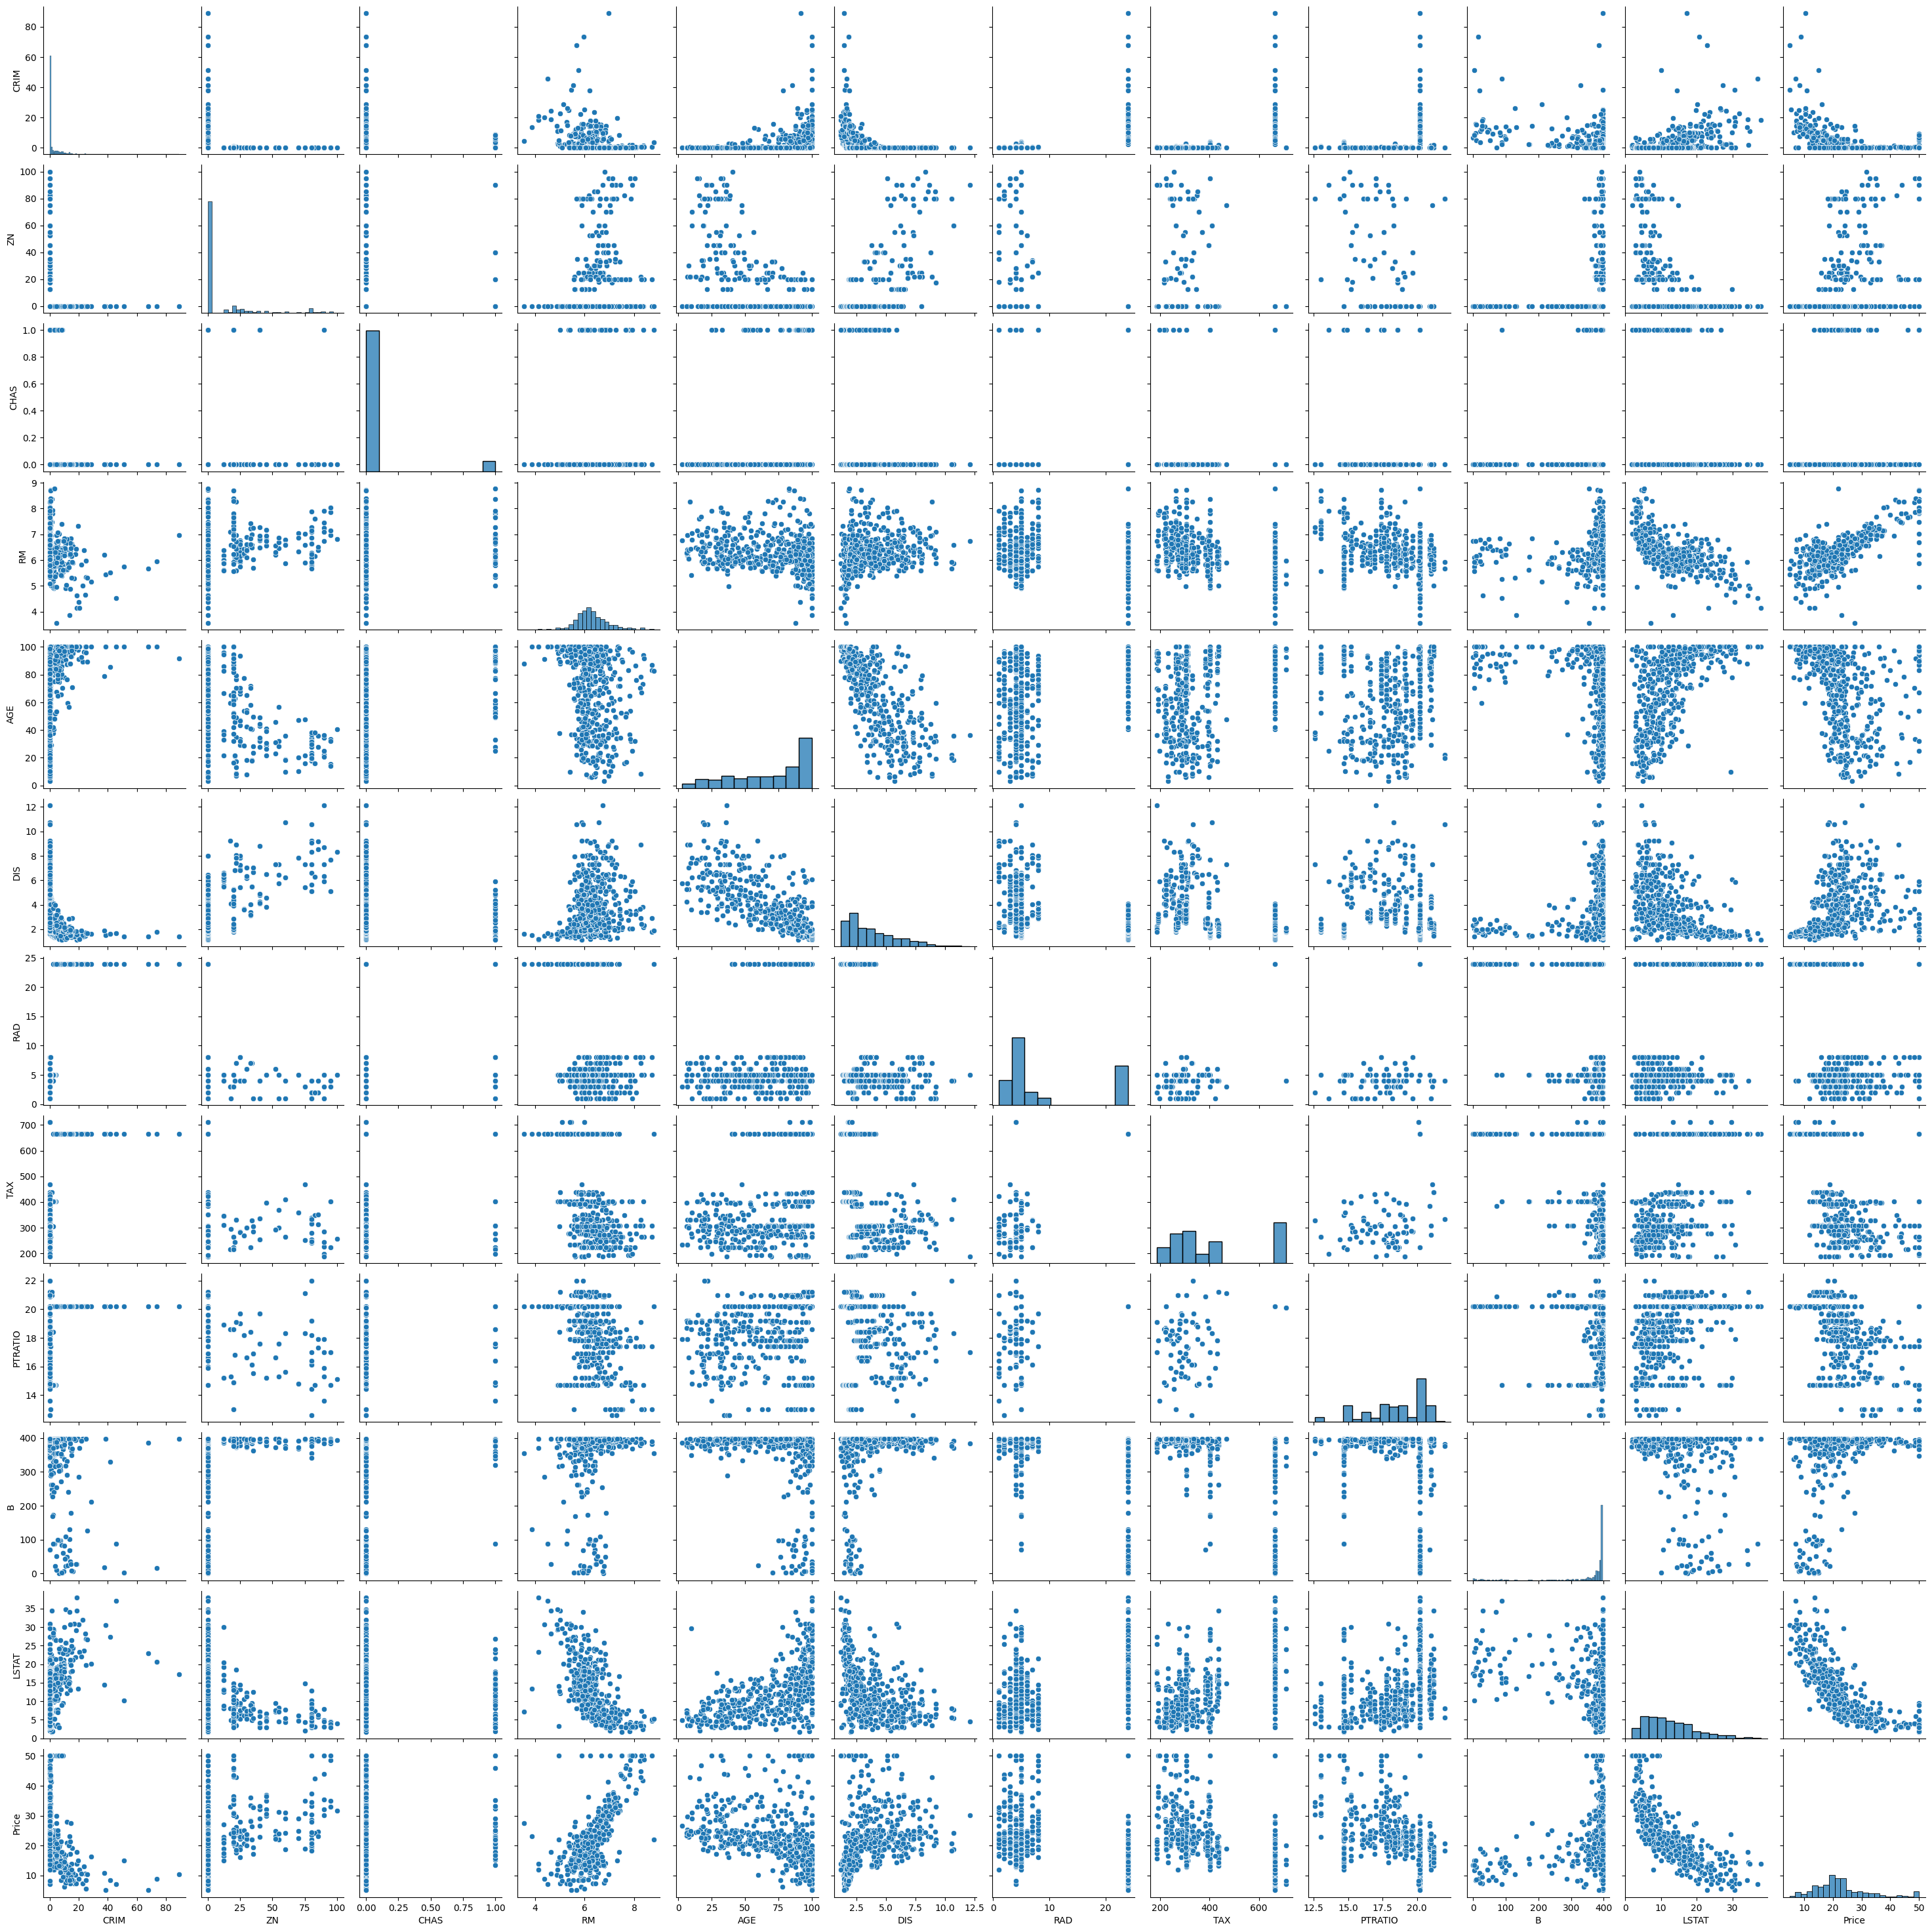

In [28]:
boston_df.drop(["INDUS", "NOX"], axis=1,inplace = True, errors='ignore')
sns.pairplot(boston_df)
boston_df.LSTAT = np.log(boston_df.LSTAT)


In [2]:
# # ~ non sense to change the kernal to this directory
# import os
# os.chdir(r"C:\Users\Bryce\Desktop\MACHINE_LEARNING\BookPractice\ride_lasso")
# os.getcwd()

'C:\\Users\\Bryce\\Desktop\\MACHINE_LEARNING\\BookPractice\\ride_lasso'